In [186]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [187]:
df = pd.read_csv("train.csv")
df.drop(columns=["Id"], inplace=True)
df.head(10)

,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb,CO2 Emissions(g/km)
0,FOLD,PICKUP TRUCK - STANDARD,3.5,6.0,A6,X,8.64 liters per 100 km,6.14 L/100 km,37.59 mpg Imp.,306.0
1,CHEVO,PICKUP TRUCK - STANDARD,5.3,NaN,A6,E,27.27 liters per 100 km,30.76 liters per 100 km,28.84 L/100 km,283.0
2,BMV,SUBCOMPACT,4.4,NaN,M6,Z,0.17 L/10km,2.03 liters per 100 km,zero,329.0
3,KIO,SUV - SMALL,NaN,4.0,AS6,X,6.52 km per L,1.59 L/10km,NaN,270.0
4,BARUSU,MINICOMPACT,3.0,6.0,unspecified,Z,20.15 L/100km,0.60 L/10km,1.38 L/10km,193.0
5,LECUS,COMPACT,unspecified,4.0,not-recorded,Z,5.57 MPG (AS),38.28 mpg Imp.,8.86 MPG (AS),217.0
6,GONDA,FULL-SIZE,1.8,4.0,AV7,X,7.52 L/100km,14.76 mpg Imp.,12.75 L/100 km,174.0
7,LAND CRAWLER,SUV - SMALL,2.0,4.0,AS8,Z,28.55 MPG (AS),2.06 liters per 100 km,18.33 km/L,246.0
8,CHEVO,SUV - STANDARD,3.6,NaN,A9,X,9.16 mpg Imp.,2.08 L/10km,26.31 L/100km,278.0
9,FOLKSWA,COMPACT,2.0,4.0,AS6,X,43.84 km per L,18.13 L/100 km,-9999,202.0


In [188]:
df.dropna(inplace=True)

In [189]:
for column in df.columns:
  print(df[column].unique())
  print(" ")
df.drop_duplicates(inplace=True)
len(df)

['FOLD' 'BARUSU' 'LECUS' 'GONDA' 'LAND CRAWLER' 'FOLKSWA' 'TOYOTI' 'BMV'
 'JIPU' 'CHEVO' 'ASURA' 'KIO' 'FIAR' 'TOLVO' 'DOGE' 'MATSUDA' 'NIRRAN'
 'MITSU' 'CADILUXE' 'LAMBOGI' 'RYUNDAI']
 
['PICKUP TRUCK - STANDARD' 'MINICOMPACT' 'COMPACT' 'FULL-SIZE'
 'SUV - SMALL' 'SUBCOMPACT' 'MINIVAN' 'SUV - STANDARD'
 'STATION WAGON - SMALL' 'missing' 'TWO-SEATER' 'MID-SIZE'
 'PICKUP TRUCK - SMALL' 'VAN - PASSENGER' 'not-recorded' 'na'
 'SPECIAL PURPOSE VEHICLE' 'unspecified' 'unknown'
 'STATION WAGON - MID-SIZE' 'VAN - CARGO' 'not-available' '-1'
 'unestablished']
 
['3.5' '3.0' 'unspecified' '1.8' '2.0' '2.5' 'missing' '2.3' '5.3' '1.4'
 '2.4' '1.6' '4.4' '1.3' '6.2' '3.6' '4.8' '2.7' '6.0' '6.5' '5.7' '3.7'
 '1.2' '3.3' '1.5' '5.0' '3.2' '4.0' '5.2' 'not-recorded' 'not-available'
 '-1' 'unknown' 'na' 'unestablished' '4.3' '6.4' '4.6' '6.6' '3.8' '5.4'
 '1.0' '5.6' '5.8' '3.4' '8.4' '2.8' '6.8' '2.2' '4.2']
 
['6.0' '4.0' '8.0' '12.0' 'unspecified' 'not-recorded' '3.0' '-1'
 'missing' '5.0' 'unkno

97604

In [190]:
def CleanData(df, col):
        del_index=df[
        (df[col]=='unspecified') | 
        (df[col]=='missing') | 
        (df[col]=='not-recorded') | 
        (df[col]=='not-available') |
        (df[col]=='-1') |
        (df[col]=='unknown') |
        (df[col]=='na') |
        (df[col]=='unestablished')].index
        df.drop(del_index, inplace=True)
        df.reset_index()    
        return df
col_clean=['Vehicle Class', 'Engine Size(L)', 'Cylinders', 'Transmission', 'Fuel Type']
for col in col_clean:
        df=CleanData(df, col)

for column in df.columns:
  print(df[column].unique())
  print(" ")
df.drop_duplicates(inplace=True)
len(df)

['FOLD' 'GONDA' 'LAND CRAWLER' 'FOLKSWA' 'TOYOTI' 'BMV' 'CHEVO' 'ASURA'
 'LECUS' 'KIO' 'FIAR' 'TOLVO' 'DOGE' 'MATSUDA' 'NIRRAN' 'JIPU' 'LAMBOGI'
 'CADILUXE' 'RYUNDAI' 'MITSU' 'BARUSU']
 
['PICKUP TRUCK - STANDARD' 'FULL-SIZE' 'SUV - SMALL' 'COMPACT'
 'SUBCOMPACT' 'MINIVAN' 'SUV - STANDARD' 'STATION WAGON - SMALL'
 'TWO-SEATER' 'MID-SIZE' 'PICKUP TRUCK - SMALL' 'VAN - PASSENGER'
 'SPECIAL PURPOSE VEHICLE' 'STATION WAGON - MID-SIZE' 'VAN - CARGO'
 'MINICOMPACT']
 
['3.5' '1.8' '2.0' '2.5' '3.0' '2.3' '5.3' '1.4' '2.4' '4.4' '1.3' '6.2'
 '3.6' '4.8' '2.7' '6.0' '6.5' '3.7' '5.7' '1.5' '5.0' '3.3' '5.2' '1.6'
 '4.0' '1.2' '4.3' '6.4' '6.6' '3.8' '5.4' '4.6' '3.2' '5.6' '5.8' '1.0'
 '8.4' '2.8' '3.4' '6.8' '2.2' '4.2']
 
['6.0' '4.0' '8.0' '12.0' '5.0' '10.0' '3.0']
 
['A6' 'AV7' 'AS8' 'AS6' 'M6' 'A8' 'A9' 'AV6' 'AS10' 'AM7' 'M5' 'AV' 'AS7'
 'AS5' 'A5' 'AS9' 'AM6' 'AV8' 'A4' 'AM9' 'AV10' 'AM8' 'M7' 'A7' 'A10']
 
['X' 'Z' 'D' 'E' 'N']
 
['8.64 liters per 100 km' '7.52 L/100km' '28.55 MPG (AS

75980

In [191]:
for column in df.columns:
  print(df[column].unique())
  print(" ")

['FOLD' 'GONDA' 'LAND CRAWLER' 'FOLKSWA' 'TOYOTI' 'BMV' 'CHEVO' 'ASURA'
 'LECUS' 'KIO' 'FIAR' 'TOLVO' 'DOGE' 'MATSUDA' 'NIRRAN' 'JIPU' 'LAMBOGI'
 'CADILUXE' 'RYUNDAI' 'MITSU' 'BARUSU']
 
['PICKUP TRUCK - STANDARD' 'FULL-SIZE' 'SUV - SMALL' 'COMPACT'
 'SUBCOMPACT' 'MINIVAN' 'SUV - STANDARD' 'STATION WAGON - SMALL'
 'TWO-SEATER' 'MID-SIZE' 'PICKUP TRUCK - SMALL' 'VAN - PASSENGER'
 'SPECIAL PURPOSE VEHICLE' 'STATION WAGON - MID-SIZE' 'VAN - CARGO'
 'MINICOMPACT']
 
['3.5' '1.8' '2.0' '2.5' '3.0' '2.3' '5.3' '1.4' '2.4' '4.4' '1.3' '6.2'
 '3.6' '4.8' '2.7' '6.0' '6.5' '3.7' '5.7' '1.5' '5.0' '3.3' '5.2' '1.6'
 '4.0' '1.2' '4.3' '6.4' '6.6' '3.8' '5.4' '4.6' '3.2' '5.6' '5.8' '1.0'
 '8.4' '2.8' '3.4' '6.8' '2.2' '4.2']
 
['6.0' '4.0' '8.0' '12.0' '5.0' '10.0' '3.0']
 
['A6' 'AV7' 'AS8' 'AS6' 'M6' 'A8' 'A9' 'AV6' 'AS10' 'AM7' 'M5' 'AV' 'AS7'
 'AS5' 'A5' 'AS9' 'AM6' 'AV8' 'A4' 'AM9' 'AV10' 'AM8' 'M7' 'A7' 'A10']
 
['X' 'Z' 'D' 'E' 'N']
 
['8.64 liters per 100 km' '7.52 L/100km' '28.55 MPG (AS

In [192]:
def is_float(num):
    try:
        float(num)
        return True
    except:
        return False
list_temp=[]

for record in df["Fuel Consumption City"]:
    try:
        list_word=record.split(" ", 1)
        list_temp.append(list_word[1])
    except:
        continue
for rec in set(list_temp):
    if(is_float(rec)):
        continue
    else:
        print(rec)

km/L
liters per 100 km
L/100 km
L/10km
L/100km
mpg Imp.
km per L
MPG (AS)


In [193]:
def convert_to_km_l(value, unit):
    if unit=="mpg Imp.":
        return(float(value)/0.354006)
    elif unit=="liters per 100 km" or unit=="L/100 km" or unit=="L/100km":
        return(100/float(value))
    elif unit=="km/L" or unit=="km per L":
        return(float(value))
    elif unit=="L/10km":
        return(10/float(value))
    elif unit=="MPG (AS)":
        return(float(value)/0.4251434788508811)

In [194]:
list_temp=[]
for record in df["Fuel Consumption City"]:
    try:
        list_word=record.split(" ", 1)
        list_temp.append(convert_to_km_l(list_word[0], list_word[1]))
    except:
        list_temp.append(0)
df["Fuel Consumption City"] = list_temp

list_temp.clear()
for record in df["Fuel Consumption Hwy"]:
    try:
        list_word=record.split(" ", 1)
        list_temp.append(convert_to_km_l(list_word[0], list_word[1]))
    except:
        list_temp.append(0)
df["Fuel Consumption Hwy"] = list_temp

list_temp.clear()
for record in df["Fuel Consumption Comb"]:
    try:
        list_word=record.split(" ", 1)
        list_temp.append(convert_to_km_l(list_word[0], list_word[1]))
    except:
        list_temp.append(0)
df["Fuel Consumption Comb"] = list_temp
list_temp.clear()
for rec in list_temp:
    print(rec)

In [195]:
df.head(10)

,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb,CO2 Emissions(g/km)
0,FOLD,PICKUP TRUCK - STANDARD,3.5,6.0,A6,X,11.574074,16.286645,106.184641,306.0
6,GONDA,FULL-SIZE,1.8,4.0,AV7,X,13.297872,41.694209,7.843137,174.0
7,LAND CRAWLER,SUV - SMALL,2.0,4.0,AS8,Z,67.153800,48.543689,18.330000,246.0
9,FOLKSWA,COMPACT,2.0,4.0,AS6,X,43.840000,5.515720,0.000000,202.0
10,TOYOTI,SUV - SMALL,2.5,4.0,AS6,X,3.606203,44.052863,0.000000,216.0
11,BMV,SUBCOMPACT,3.0,6.0,M6,Z,5.260389,93.416496,6.990000,236.0
12,TOYOTI,MINIVAN,2.0,4.0,AS6,X,45.454545,18.867925,27.940000,260.0
17,FOLD,SUV - STANDARD,2.3,4.0,AS6,X,19.920319,14.245014,16.891892,263.0
19,CHEVO,SUV - STANDARD,5.3,8.0,A6,X,6.609385,2.376991,20.299029,335.0
20,LAND CRAWLER,SUV - STANDARD,3.0,6.0,AS8,D,14.104372,0.000000,144.404332,247.0


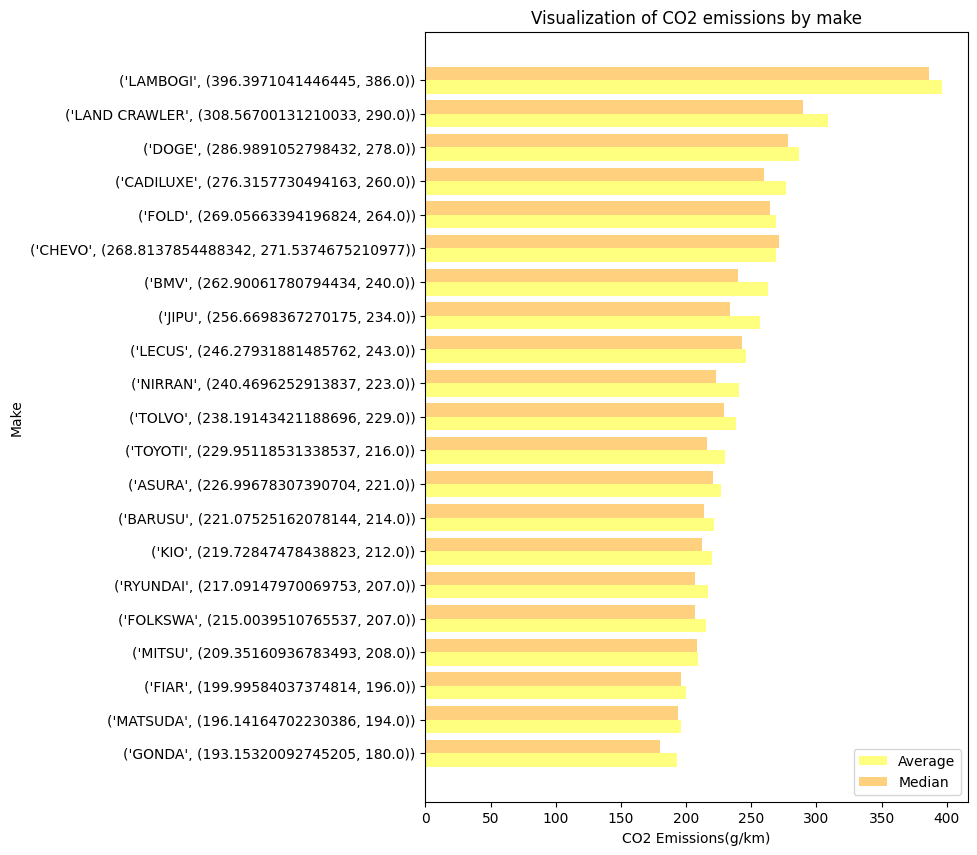

In [196]:
col_make=df["Make"].unique()
make_avg=[np.average(df["CO2 Emissions(g/km)"][df["Make"]==col]) for col in col_make]
make_median=[np.median(df["CO2 Emissions(g/km)"][df["Make"]==col]) for col in col_make]
dict_make=dict(zip(col_make, zip(make_avg, make_median)))
dict_make=sorted(dict_make.items(), key=lambda item: item[1])

fig, ax = plt.subplots(figsize=(7,10))
bar_width = 0.4

bar1 = ax.barh(np.arange(len(col_make)), [dict_make[:][i][1][0] for i in range(len(dict_make))], height=bar_width, color='yellow', alpha=0.5, label='Average')
bar2 = ax.barh(np.arange(len(col_make)) + bar_width, [dict_make[:][i][1][1] for i in range(len(dict_make))], height=bar_width, color='orange', alpha=0.5, label='Median')

ax.set_yticks(np.arange(len(col_make)) + bar_width / 2)
ax.set_yticklabels(dict_make)
ax.set_xlabel('CO2 Emissions(g/km)')
ax.set_ylabel('Make')
ax.set_title('Visualization of CO2 emissions by make')
ax.legend()

plt.show()


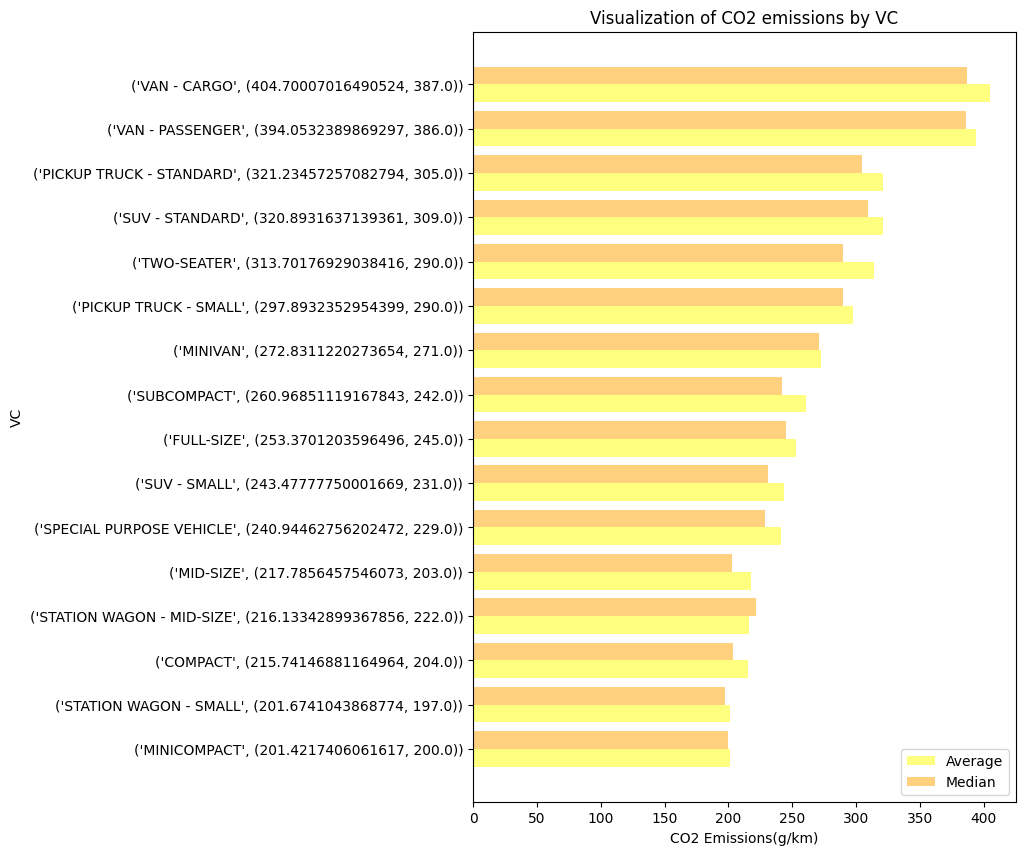

In [228]:
col_vehicle=df["Vehicle Class"].unique()
vehicle_avg=[np.average(df["CO2 Emissions(g/km)"][df["Vehicle Class"]==col]) for col in col_vehicle]
vehicle_median=[np.median(df["CO2 Emissions(g/km)"][df["Vehicle Class"]==col]) for col in col_vehicle]
dict_vehicle=dict(zip(col_vehicle, zip(vehicle_avg, vehicle_median)))
dict_vehicle=sorted(dict_vehicle.items(), key=lambda item: item[1])

fig, ax = plt.subplots(figsize=(7,10))
bar_width = 0.4

bar1 = ax.barh(np.arange(len(col_vehicle)), [dict_vehicle[:][i][1][0] for i in range(len(dict_vehicle))], height=bar_width, color='yellow', alpha=0.5, label='Average')
bar2 = ax.barh(np.arange(len(col_vehicle)) + bar_width, [dict_vehicle[:][i][1][1] for i in range(len(dict_vehicle))], height=bar_width, color='orange', alpha=0.5, label='Median')

ax.set_yticks(np.arange(len(col_vehicle)) + bar_width / 2)
ax.set_yticklabels(dict_vehicle)
ax.set_xlabel('CO2 Emissions(g/km)')
ax.set_ylabel('VC')
ax.set_title('Visualization of CO2 emissions by VC')
ax.legend()

plt.show()

In [ ]:
def visualize_sorted_mean(column_name=""):
  col_vehicle=df[column_name].unique()
  transmission_avg=[np.average(df["CO2 Emissions(g/km)"][df[column_name]==col]) for col in col_vehicle]
  transmission_median=[np.median(df["CO2 Emissions(g/km)"][df[column_name]==col]) for col in col_vehicle]
  dict_vehicle=dict(zip(col_vehicle, zip(vehicle_avg, vehicle_median)))
  dict_vehicle=sorted(dict_vehicle.items(), key=lambda item: item[1])

  fig, ax = plt.subplots(figsize=(7,10))
  bar_width = 0.4

  bar1 = ax.barh(np.arange(len(col_vehicle)), [dict_vehicle[:][i][1][0] for i in range(len(dict_vehicle))], height=bar_width, color='yellow', alpha=0.5, label='Average')
  bar2 = ax.barh(np.arange(len(col_vehicle)) + bar_width, [dict_vehicle[:][i][1][1] for i in range(len(dict_vehicle))], height=bar_width, color='orange', alpha=0.5, label='Median')

  ax.set_yticks(np.arange(len(col_vehicle)) + bar_width / 2)
  ax.set_yticklabels(dict_vehicle)
  ax.set_xlabel('CO2 Emissions(g/km)')
  ax.set_ylabel('VC')
  ax.set_title('Visualization of CO2 emissions by VC')
  ax.legend()

  plt.show()

In [197]:
make_map={}
for i in range(len(dict_make)):
    make_map[dict_make[i][0]]=make_avg[i]
df["MakeAvg"]=df["Make"].map(make_map)
df["MakeAvg"] -= df["MakeAvg"].min()
df["MakeAvg"] /= df["MakeAvg"].max()


make_map={}
for i in range(len(dict_make)):
    make_map[dict_make[i][0]]=i+1
df["Make"]=df["Make"].map(make_map)

print(df["Make"].unique())

[17  1 20  5 10 15 16  9 13  7  3 11 19  2 12 14 21 18  6  4  8]


In [198]:
print(df['MakeAvg'].unique())

[1.         0.37345983 0.07969936 0.18105332 0.13075558 0.23280612
 0.31251435 0.26139095 0.46169112 0.37226497 0.56785861 0.03366713
 0.11778104 0.         0.22159697 0.01470374 0.13738198 0.40917622
 0.34317102 0.10750999 0.16651708]


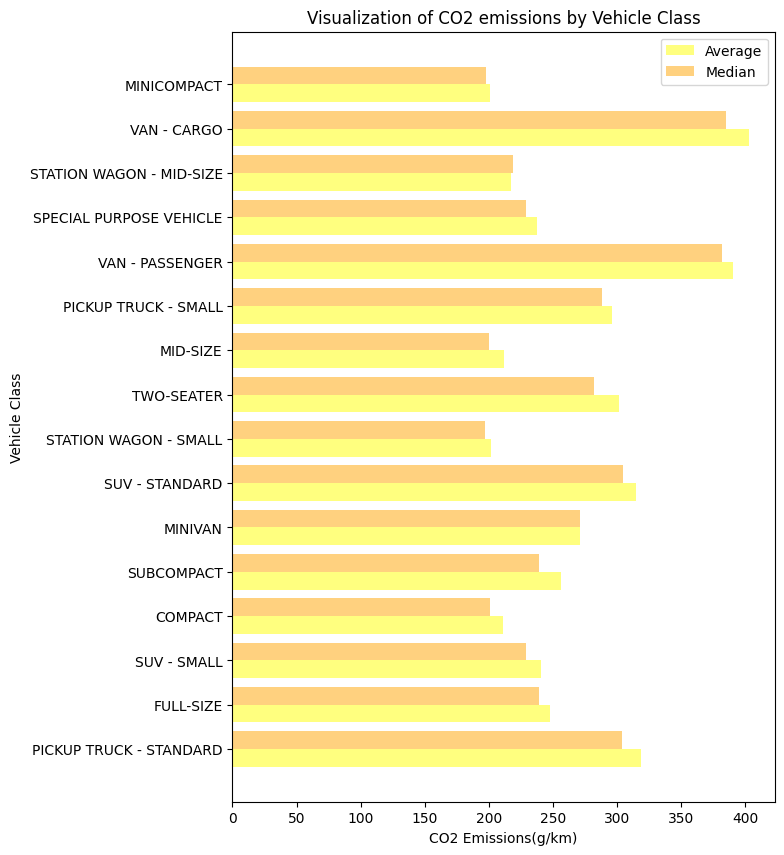

In [199]:
col_vc=df["Vehicle Class"].unique()
vc_avg=[np.average(df["CO2 Emissions(g/km)"][df["Vehicle Class"]==col]) for col in col_vc]
vc_median=[np.median(df["CO2 Emissions(g/km)"][df["Vehicle Class"]==col]) for col in col_vc]

fig, ax = plt.subplots(figsize=(7,10))
bar_width = 0.4

bar1 = ax.barh(np.arange(len(col_vc)), vc_avg, height=bar_width, color='yellow', alpha=0.5, label='Average')
bar2 = ax.barh(np.arange(len(col_vc)) + bar_width, vc_median, height=bar_width, color='orange', alpha=0.5, label='Median')

ax.set_yticks(np.arange(len(col_vc)) + bar_width / 2)
ax.set_yticklabels(col_vc)
ax.set_xlabel('CO2 Emissions(g/km)')
ax.set_ylabel('Vehicle Class')
ax.set_title('Visualization of CO2 emissions by Vehicle Class')
ax.legend()

plt.show()


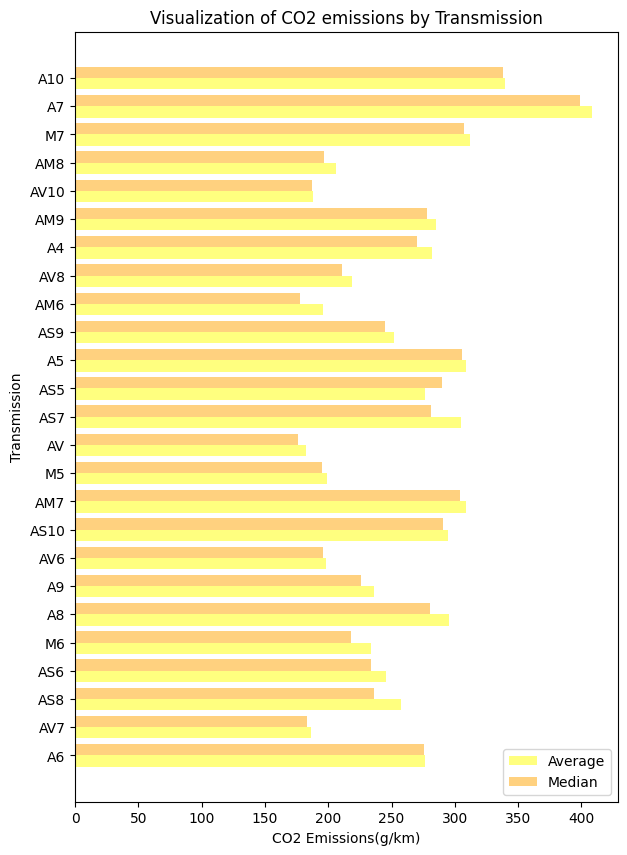

In [200]:
col_trans=df["Transmission"].unique()
trans_avg=[np.average(df["CO2 Emissions(g/km)"][df["Transmission"]==col]) for col in col_trans]
trans_median=[np.median(df["CO2 Emissions(g/km)"][df["Transmission"]==col]) for col in col_trans]

fig, ax = plt.subplots(figsize=(7,10))
bar_width = 0.4

bar1 = ax.barh(np.arange(len(col_trans)), trans_avg, height=bar_width, color='yellow', alpha=0.5, label='Average')
bar2 = ax.barh(np.arange(len(col_trans)) + bar_width, trans_median, height=bar_width, color='orange', alpha=0.5, label='Median')

ax.set_yticks(np.arange(len(col_trans)) + bar_width / 2)
ax.set_yticklabels(col_trans)
ax.set_xlabel('CO2 Emissions(g/km)')
ax.set_ylabel('Transmission')
ax.set_title('Visualization of CO2 emissions by Transmission')
ax.legend()

plt.show()


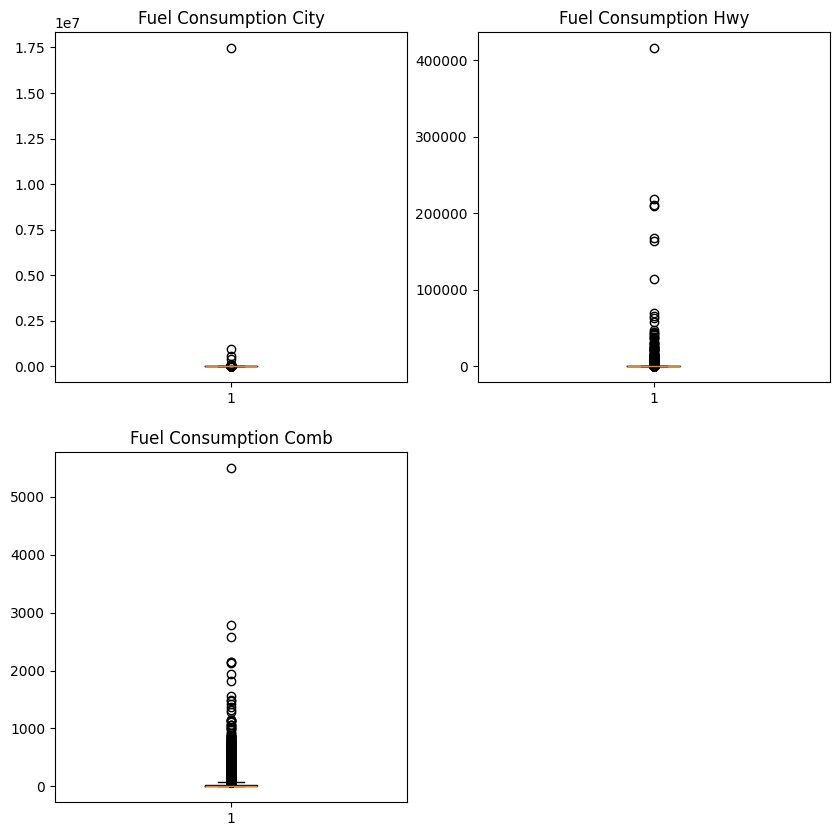

In [201]:
col_box=['Fuel Consumption City', 'Fuel Consumption Hwy','Fuel Consumption Comb']
plt.subplots(figsize=(10,10))
plt.delaxes()
i=1
for col in col_box:
    plt.subplot(2,2,i)
    plt.boxplot(df[col])
    plt.title(col)
    i+=1
plt.show()

In [202]:
#MAPPING
# make_mapping = {
#   'FOLD': 0, 'CHEVO': 1, 
#   'BMV': 2, 'KIO': 3, 
#   'BARUSU': 4, 'LECUS': 5, 
#   'GONDA': 6, 'LAND CRAWLER': 7, 
#   'FOLKSWA': 8, 'TOYOTI': 9, 
#   'JIPU': 10, 'TOLVO': 11, 
#   'ASURA': 12, 'NIRRAN':13, 
#   'FIAR': 14, 'DOGE':15, 
#   'CADILUXE':16, 'MATSUDA':17, 
#   'MITSU':18, 'RYUNDAI':19, 
#   'LAMBOGI':20
# }

# ['PICKUP TRUCK - STANDARD' 'SUBCOMPACT' 'SUV - SMALL' 'MINICOMPACT'
#  'COMPACT' 'FULL-SIZE' 'SUV - STANDARD' 'MINIVAN' 'STATION WAGON - SMALL'
#  nan 'PICKUP TRUCK - SMALL' 'missing' 'TWO-SEATER'
#  'STATION WAGON - MID-SIZE' 'MID-SIZE' 'SPECIAL PURPOSE VEHICLE'
#  'VAN - PASSENGER' '-1' 'not-recorded' 'na' 'unspecified' 'unknown'
#  'unestablished' 'VAN - CARGO' 'not-available']

# df['Make'] = df['Make'].map(make_mapping)

In [203]:
#['X' 'E' 'Z' nan 'D' '-1' 'missing' 'unspecified' 'not-recorded' 'unknown', 'unestablished' 'na' 'not-available' 'N']
# len(df[df["Fuel Type"=="unknown"]])
df["Fuel Type"].value_counts()

Fuel Type
X    49750
Z    20861
E     3769
D     1585
N       15
Name: count, dtype: int64

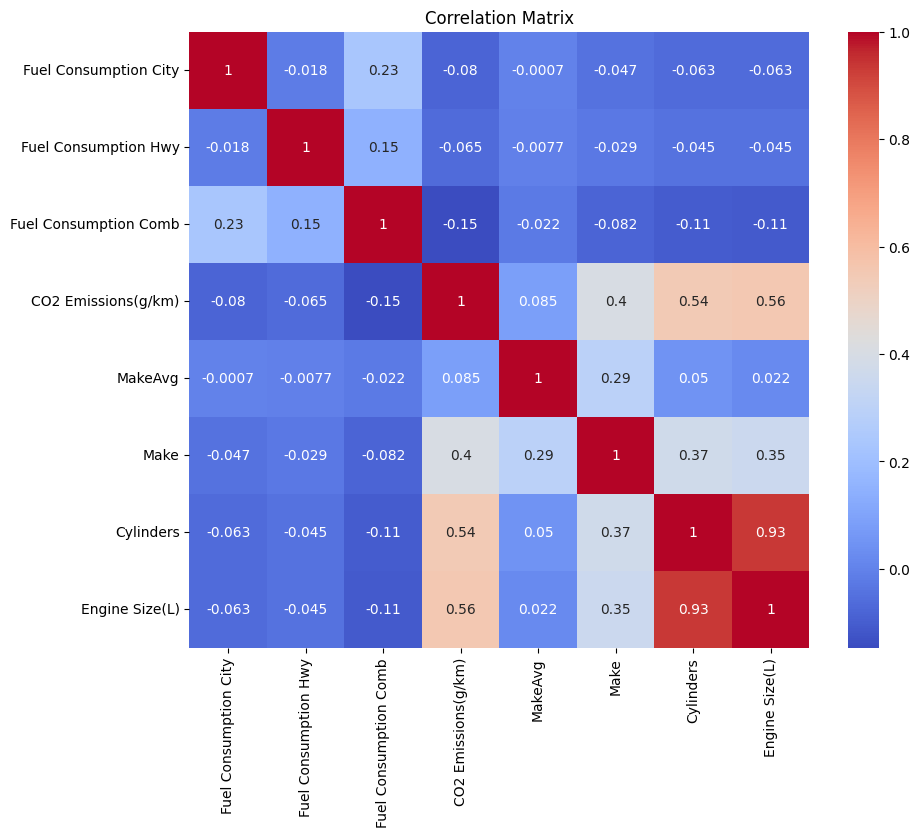

In [224]:
corr=df[["Fuel Consumption City", "Fuel Consumption Hwy", "Fuel Consumption Comb", "CO2 Emissions(g/km)", "MakeAvg","Make",  "Cylinders", "Engine Size(L)"]].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

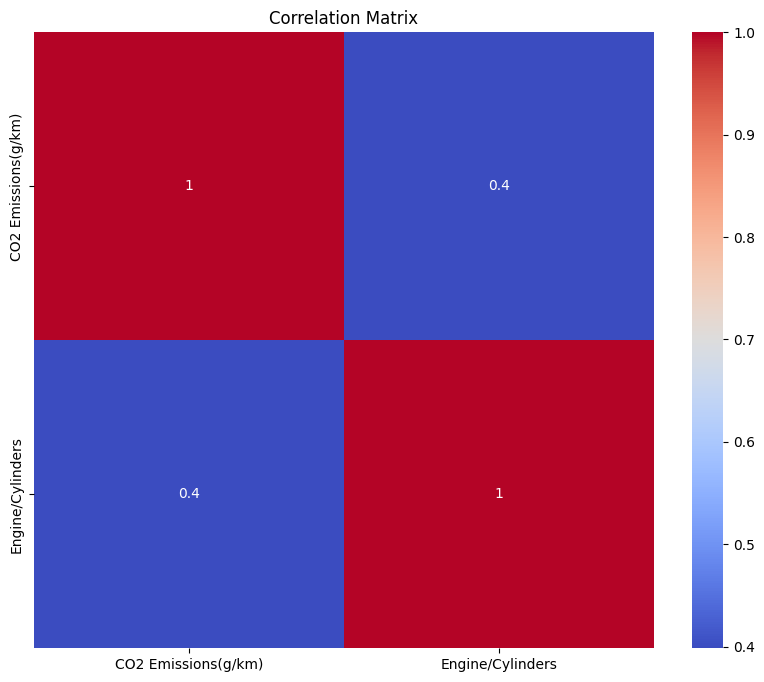

In [205]:
df["Engine/Cylinders"]=df["Engine Size(L)"].astype(float)/df["Cylinders"].astype(float)
corr=df[["CO2 Emissions(g/km)", "Engine/Cylinders"]].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

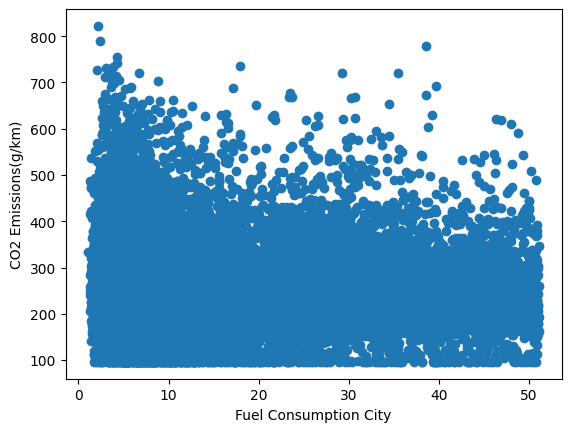

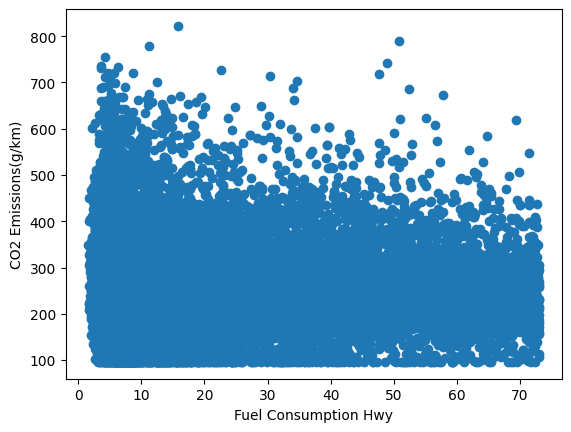

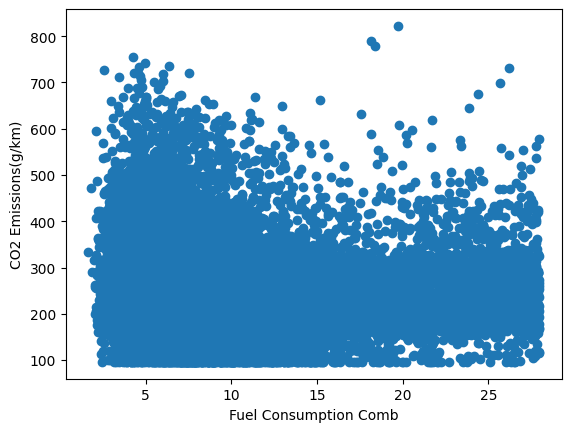

In [220]:
plt.scatter(df["Fuel Consumption City"], df["CO2 Emissions(g/km)"])
plt.xlabel("Fuel Consumption City")
plt.ylabel("CO2 Emissions(g/km)")  
plt.show()

plt.scatter(df["Fuel Consumption Hwy"], df["CO2 Emissions(g/km)"])
plt.xlabel("Fuel Consumption Hwy")
plt.ylabel("CO2 Emissions(g/km)")  
plt.show()

plt.scatter(df["Fuel Consumption Comb"], df["CO2 Emissions(g/km)"])
plt.xlabel("Fuel Consumption Comb")
plt.ylabel("CO2 Emissions(g/km)")  
plt.show()
# corr=df[["Fuel Consumption City", "Fuel Consumption Hwy", "Fuel Consumption Comb", "CO2 Emissions(g/km)", "Make", "Cylinders", "Engine Size(L)"]].corr()

In [207]:
max(df["Fuel Consumption City"])

17457479.98

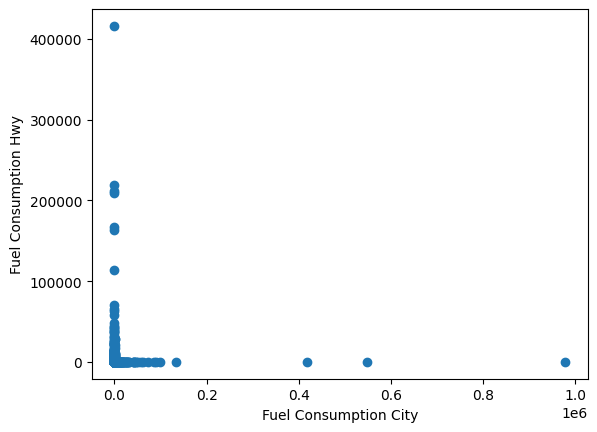

In [208]:
# del_index=df[(df["Fuel Consumption City"]>15000) | (df["Fuel Consumption Hwy"]>15000) | (df["Fuel Consumption Comb"]>800)].index
del_index=df[(df["Fuel Consumption City"]>15000000)].index
df.drop(del_index, inplace=True)
df.reset_index()
plt.scatter(df["Fuel Consumption City"], df["Fuel Consumption Hwy"])
plt.xlabel("Fuel Consumption City")
plt.ylabel("Fuel Consumption Hwy")  
plt.show()

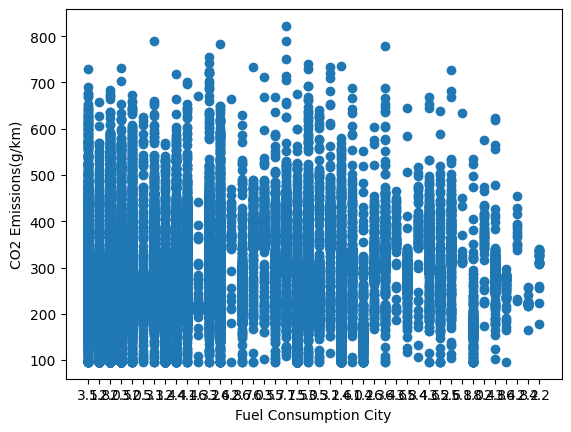

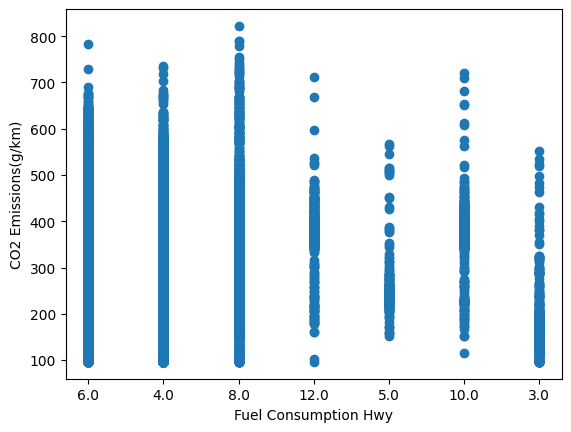

In [209]:
plt.scatter(df["Engine Size(L)"], df["CO2 Emissions(g/km)"])
plt.xlabel("Fuel Consumption City")
plt.ylabel("CO2 Emissions(g/km)")  
plt.show()

plt.scatter(df["Cylinders"], df["CO2 Emissions(g/km)"])
plt.xlabel("Fuel Consumption Hwy")
plt.ylabel("CO2 Emissions(g/km)")  
plt.show()
# corr=df[["Fuel Consumption City", "Fuel Consumption Hwy", "Fuel Consumption Comb", "CO2 Emissions(g/km)", "Make", "Cylinders", "Engine Size(L)"]].corr()

In [221]:
print(len(df))
df.to_csv("preprocessing.csv")

35472


In [211]:
df.head(20)

,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb,CO2 Emissions(g/km),MakeAvg,Engine/Cylinders
0,17,PICKUP TRUCK - STANDARD,3.5,6.0,A6,X,11.574074,16.286645,106.184641,306.0,1.000000,0.583333
6,1,FULL-SIZE,1.8,4.0,AV7,X,13.297872,41.694209,7.843137,174.0,0.373460,0.450000
7,20,SUV - SMALL,2.0,4.0,AS8,Z,67.153800,48.543689,18.330000,246.0,0.079699,0.500000
9,5,COMPACT,2.0,4.0,AS6,X,43.840000,5.515720,0.000000,202.0,0.181053,0.500000
10,10,SUV - SMALL,2.5,4.0,AS6,X,3.606203,44.052863,0.000000,216.0,0.130756,0.625000
11,15,SUBCOMPACT,3.0,6.0,M6,Z,5.260389,93.416496,6.990000,236.0,0.232806,0.500000
12,10,MINIVAN,2.0,4.0,AS6,X,45.454545,18.867925,27.940000,260.0,0.130756,0.500000
17,17,SUV - STANDARD,2.3,4.0,AS6,X,19.920319,14.245014,16.891892,263.0,1.000000,0.575000
19,16,SUV - STANDARD,5.3,8.0,A6,X,6.609385,2.376991,20.299029,335.0,0.312514,0.662500
20,20,SUV - STANDARD,3.0,6.0,AS8,D,14.104372,0.000000,144.404332,247.0,0.079699,0.500000


In [212]:
#Removing Outliers
def remove_outliers(df, column_name=""):
  q1 = df[column_name].quantile(0.25)
  q3 = df[column_name].quantile(0.75)

  IQR = q3 - q1

  lower_limit = q1 - 1.5 * IQR
  upper_limit = q3 + 1.5 * IQR

  df = df[(df[column_name] >= lower_limit) & (df[column_name] <= upper_limit)]
  df.reset_index()
  return df


In [225]:
def remove_zeros(df, column_name=""):
  df = df[df[column_name] != 0]
  df.reset_index()
  return df

In [218]:
df = remove_outliers(df,"Fuel Consumption City")
df = remove_outliers(df,"Fuel Consumption Hwy")
df = remove_outliers(df,"Fuel Consumption Comb")

6         13.297872
7         67.153800
11         5.260389
12        45.454545
17        19.920319
            ...    
137115     6.370000
137119     4.201681
137122     6.329114
137131     4.317789
137140    29.761905
Name: Fuel Consumption City, Length: 48034, dtype: float64
6         41.694209
11        93.416496
12        18.867925
17        14.245014
19         2.376991
            ...    
137115    26.315789
137119    33.841234
137122     6.130000
137131     5.941771
137140    35.714286
Name: Fuel Consumption Hwy, Length: 44625, dtype: float64
6          7.843137
12        27.940000
17        16.891892
19        20.299029
22         9.737098
            ...    
137115     9.680000
137119    23.333299
137122     6.234414
137131     4.926108
137140    32.270000
Name: Fuel Consumption Comb, Length: 41601, dtype: float64


In [219]:
df[["Fuel Consumption City", "Fuel Consumption Hwy", "Fuel Consumption Comb", "CO2 Emissions(g/km)"]].describe()


,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb,CO2 Emissions(g/km)
count,35472.000000,35472.000000,35472.000000,35472.000000
mean,13.463069,19.106289,8.984401,254.186869
std,11.887864,17.134751,5.056096,77.502273
min,1.080000,1.572080,1.650000,96.000000
25%,5.015045,6.830000,5.570000,204.000000
50%,8.295315,11.580000,7.450000,238.000000
75%,18.111533,26.315789,10.638298,293.000000
max,51.159199,73.050000,27.967029,822.111635


In [223]:
df.to_csv("preprocessing_1.csv")